In [12]:
# External imports
import numpy as np 
import pandas as pd 

In [13]:
# Load DataFrames
train_ = pd.read_csv('../Data/titanic/train.csv') # truth 
test_ = pd.read_csv('../Data/titanic/test.csv') # data
train_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
def GetSexRate(data_, output=False):
    ''' Sex survival rate '''
    out_ = {}
    sex_ = list(set(data_.Sex))
    for sex in sex_:  
        val_ = data_.loc[data_.Sex == sex, 'Survived'] # loc: [rows, columns] 
        rate = val_.mean() # sum(men)/len(men)
        print(f'Surviving {sex}: {100*rate:.1f}%')
        out_[sex] = 100*rate
    if output:
        return out_
    else:
        return

GetSexRate(train_)

Surviving female: 74.2%
Surviving male: 18.9%


In [15]:
def GetClassRate(data_, output=False):
    ''' Class survival rate '''
    out_ = {}
    Pclass_ = list(set(data_.Pclass))
    for Pclass in Pclass_:  
        val_ = data_.loc[data_.Pclass == Pclass, 'Survived'] 
        rate = val_.mean() 
        print(f'Survivors in class {Pclass}: {100*rate:.1f}%')
        out_[Pclass] = 100*rate
    if output:
        return out_
    else:
        return

GetClassRate(train_)

Survivors in class 1: 63.0%
Survivors in class 2: 47.3%
Survivors in class 3: 24.2%


In [16]:
def GetSibSpRate(data_, output=False):
    # Spouse/siblings survival rate
    out_ = {}
    SibSp_ = list(set(data_.SibSp))
    for SibSp in SibSp_:  
        val_ = data_.loc[data_.SibSp == SibSp, 'Survived'] 
        rate = val_.mean() 
        print(f'Survivors with {SibSp} spouse + siblings: {100*rate:.1f}%')
        out_[SibSp] = 100*rate
    if output:
        return out_
    else:
        return
    
GetSibSpRate(train_)

Survivors with 0 spouse + siblings: 34.5%
Survivors with 1 spouse + siblings: 53.6%
Survivors with 2 spouse + siblings: 46.4%
Survivors with 3 spouse + siblings: 25.0%
Survivors with 4 spouse + siblings: 16.7%
Survivors with 5 spouse + siblings: 0.0%
Survivors with 8 spouse + siblings: 0.0%


In [17]:
def GetParchRate(data_, output=False):
    # Parents/children survival rate
    out_ = {}
    Parch_ = list(set(data_.Parch))
    for Parch in Parch_:  
        val_ = data_.loc[data_.Parch == Parch, 'Survived'] 
        rate = val_.mean() 
        print(f'Survivors with {Parch} parents + children: {100*rate:.1f}%')
        out_[Parch] = 100*rate
    if output: 
        return out_
    else:
        return

GetParchRate(train_)

Survivors with 0 parents + children: 34.4%
Survivors with 1 parents + children: 55.1%
Survivors with 2 parents + children: 50.0%
Survivors with 3 parents + children: 60.0%
Survivors with 4 parents + children: 0.0%
Survivors with 5 parents + children: 20.0%
Survivors with 6 parents + children: 0.0%


In [18]:
# From tutorial
from sklearn.ensemble import RandomForestClassifier

y_ = train_["Survived"]

features_ = ["Pclass", "Sex", "SibSp", "Parch"]
X_ = pd.get_dummies(train_[features_]) # training dataset as boolean values
X_test_ = pd.get_dummies(test_[features_])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_, y_)
predictions_ = model.predict(X_test_)

output_ = pd.DataFrame({'PassengerId': test_.PassengerId, 'Survived': predictions_})
output_.to_csv('../Output/Titanic/Tutorial.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [19]:
# Merge output with test dataset
merge_ = pd.merge(output_, test_, on='PassengerId')
merge_.head()


# Gender survival rate 
# sex_ = list(set(train_.Sex))
# for sex in sex_:  
#     val_ = train_.loc[train_.Sex == sex, 'Survived'] # loc: [rows, columns] 
#     rate = val_.mean() # sum(men)/len(men)
#     print(f'Surviving {sex}: {100*rate:.1f}%')
    
# print(bar_)
# pl.BarChartOverlay(output_)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
# Compare results 

sex_ = { 'Train' : GetSexRate(train_, output=True),
            'Prediction' : GetSexRate(merge_, output=True)} 

class_ = { 'Train' : GetClassRate(train_, output=True),
            'Prediction' : GetClassRate(merge_, output=True)} 

sibsp_ = { 'Train' : GetSibSpRate(train_, output=True),
            'Prediction' : GetSibSpRate(merge_, output=True)} 

parch_ = { 'Train' : GetParchRate(train_, output=True),
            'Prediction' : GetParchRate(merge_, output=True)} 

# print(GetSexRate(train_, output=True))

Surviving female: 74.2%
Surviving male: 18.9%
Surviving female: 94.7%
Surviving male: 1.5%
Survivors in class 1: 63.0%
Survivors in class 2: 47.3%
Survivors in class 3: 24.2%
Survivors in class 1: 49.5%
Survivors in class 2: 33.3%
Survivors in class 3: 29.4%
Survivors with 0 spouse + siblings: 34.5%
Survivors with 1 spouse + siblings: 53.6%
Survivors with 2 spouse + siblings: 46.4%
Survivors with 3 spouse + siblings: 25.0%
Survivors with 4 spouse + siblings: 16.7%
Survivors with 5 spouse + siblings: 0.0%
Survivors with 8 spouse + siblings: 0.0%
Survivors with 0 spouse + siblings: 31.1%
Survivors with 1 spouse + siblings: 47.3%
Survivors with 2 spouse + siblings: 50.0%
Survivors with 3 spouse + siblings: 25.0%
Survivors with 4 spouse + siblings: 0.0%
Survivors with 5 spouse + siblings: 0.0%
Survivors with 8 spouse + siblings: 0.0%
Survivors with 0 parents + children: 34.4%
Survivors with 1 parents + children: 55.1%
Survivors with 2 parents + children: 50.0%
Survivors with 3 parents + ch


---> Wrote:
	bar_chart.png


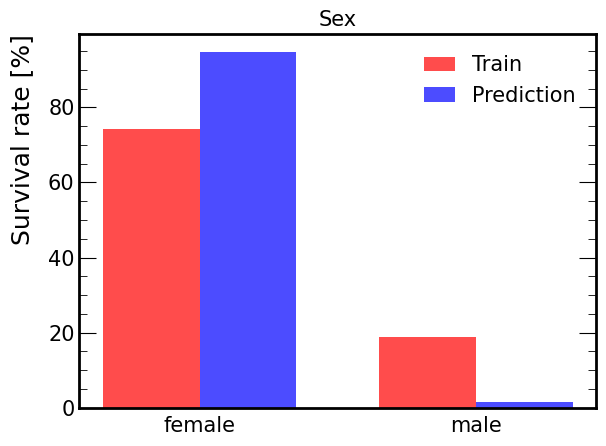


---> Wrote:
	bar_chart.png


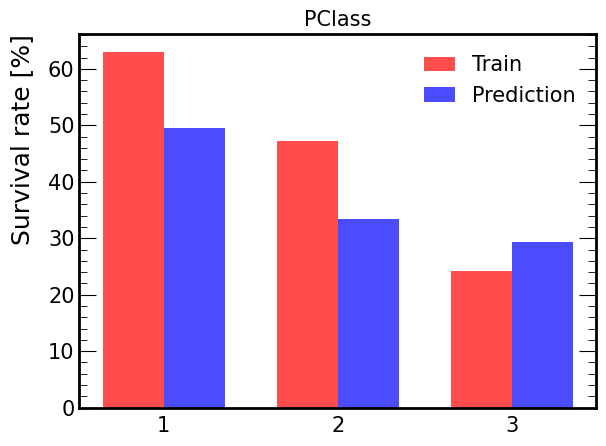


---> Wrote:
	bar_chart.png


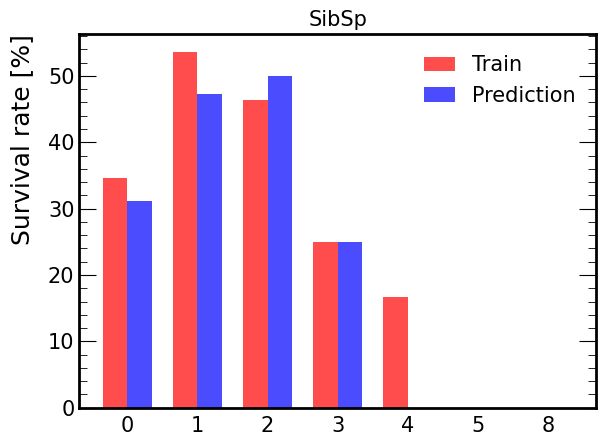


---> Wrote:
	bar_chart.png


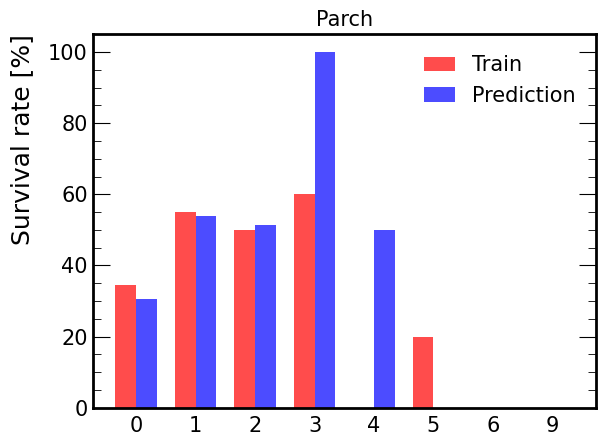

In [21]:
# Internal imports
import sys 
sys.path.append('../Common')
import PlotUtils
pl = PlotUtils.Plot() 
pl.BarChartOverlay(data_dict=sex_, title='Sex', ylabel='Survival rate [%]', show=True)
pl.BarChartOverlay(data_dict=class_, title='PClass', ylabel='Survival rate [%]', show=True)
pl.BarChartOverlay(data_dict=sibsp_, title='SibSp', ylabel='Survival rate [%]', show=True)
pl.BarChartOverlay(data_dict=parch_, title='Parch', ylabel='Survival rate [%]', show=True)

In [ ]:
# def BarCharts(
#         data, label_dict, dataset_labels, # ymin=1, ymax=-1, 
#         title=None, xlabel=None, ylabel=None, 
#         fout="bar_chart.png", percentage=False
#       ):

#         # ymin=1, ymax=-1, title=None, xlabel=None, ylabel=None, label_ = [], fout="bar_chart.png", percentage=False, bar_alpha=1.0, NDPI=300):

#     # Initialise figure and axis
#     fig, ax = plt.subplots()

#     # Initialise variables for bar width calculation
#     n_data_sets = len(data)
#     bar_width = 0.5 / n_data_sets

#     # Get unique labels
#     unique_labels = list(set(label_dict.values()))

#     # Accumulate label counts over all datasets
#     total_label_counts = np.zeros(len(uniquae_labels))
#     for dataset in data:
#         labels = [label_dict.get(p, 'other') for p in dataset]
#         unique_labels_data, label_counts_data = np.unique(labels, return_counts=True)
#         for i, label in enumerate(unique_labels_data):
#             index = np.where(unique_labels == label)[0][0]
#             total_label_counts[index] += label_counts_data[i]

#     # Loop through each dataset
#     for i, dataset in enumerate(data):

#         labels = [label_dict.get(p, 'other') for p in dataset]
#         unique_labels_data, label_counts_data = np.unique(labels, return_counts=True)

#         # Reorder label counts based on unique_labels
#         label_counts = [label_counts_data[unique_labels_data == label][0] if label in unique_labels_data else 0 for label in unique_labels]

#         if percentage:
#             label_counts = (np.array(label_counts) / sum(label_counts)) * 100

#         # Calculate the position of bars
#         indices = np.arange(len(unique_labels)) + i * bar_width

#         # Plot the bar chart for the current dataset
#         # ax.bar(indices, label_counts, align='center', alpha=bar_alpha, color=colours[i+1], edgecolor=colours[i+1], width=bar_width, fill=False, hatch='/', linewidth=1, label=label_[i])
#         ax.bar(indices, label_counts, align='center', alpha=0.1, width=bar_width, linewidth=1, label=dataset_labels[i])

#     # Set x-axis labels
#     ax.set_xticks(indices - bar_width * (n_data_sets - 1) / 2)
#     ax.set_xticklabels(unique_labels, rotation=0)

#     # Set labels for the chart
#     ax.set_title(title)
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)

#     # if (ymax > ymin):
#     #     ax.set_ylim(ymin, ymax)

#     self.ScientificNotation(ax)

#     # Legend
#     ax.legend(loc=leg_pos)

#     # Draw
#     plt.tight_layout()

#     # Save 
#     if save:
#       plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
#       print("\n---> Wrote:\n\t", fout)

#     # Save
#     if show:
#       plt.show()
      
#     # Clear memory
#     plt.close()

#     return